## Tumor Response to Treatment

In [1]:
## Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#open path
clinicaltrial_df =pd.read_csv("raw_data/clinicaltrial_data.csv")
clinicaltrial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mousedrugdata_df = pd.read_csv("raw_data/mouse_drug_data.csv")
mousedrugdata_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
#combine dfs on mouseID and check for data cleaninless
combined_df = pd.merge(clinicaltrial_df, mousedrugdata_df, on="Mouse ID")
tumor_response_table_1 = combined_df
tumor_response_table_1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [6]:
# Extract "Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug"
tumor_volume_changes_df=combined_df.loc[:,["Drug", "Timepoint","Tumor Volume (mm3)"]]

In [9]:
tumor_response_table_2 = tumor_volume_changes_df.groupby(['Drug', 'Timepoint']).mean()
tumor_response_table_2.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [10]:
timepoint_df = tumor_volume_changes_df.groupby(['Timepoint', 'Drug'], as_index=False).mean()
tumor_response_table_3 = timepoint_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_response_table_3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


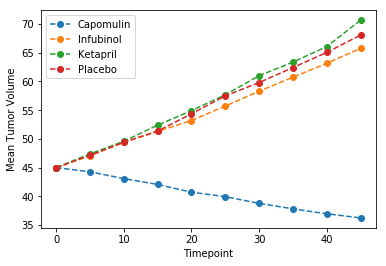

In [25]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x = tumor_volume_changes_df.Timepoint.unique()
for drug in drugs:
    y = tumor_response_table_3[drug].values
    plt.plot(x,y,'--o', label=drug )
plt.legend(loc='best')
plt.ylabel('Mean Tumor Volume')
plt.xlabel('Timepoint')

plt.show()

## Metastatic Response to Treatment

In [12]:
# Extract "Mouse ID", "Timepoint", "Metastatic Sites", "Drug"
metastatic_response_df=combined_df.loc[:,["Drug", "Timepoint","Metastatic Sites"]]

In [14]:
metastatic_response_table_1 = metastatic_response_df.groupby(['Drug', 'Timepoint']).count()
metastatic_response_table_1.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                        25
          5                        25
          10                       25
          15                       24
          20                       23

In [15]:
metastic_df = metastatic_response_df.groupby(['Timepoint', 'Drug'], as_index=False).count()
metastatic_response_table_2 = metastic_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_response_table_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


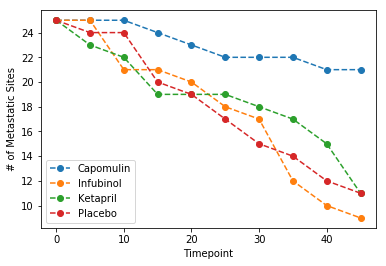

In [24]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x = metastatic_response_df.Timepoint.unique()
for drug in drugs:
    y = metastatic_response_table_2[drug].values
    plt.plot(x,y,'--o', label=drug )
plt.legend(loc='best')
plt.ylabel('# of Metastatic Sites')
plt.xlabel('Timepoint')

plt.show()

## Survival Rates

In [18]:
# Extract "Mouse ID", "Timepoint", "Metastatic Sites", "Drug"
survival_rates_df=combined_df.loc[:,["Drug", "Timepoint","Mouse ID"]]

In [19]:
survival_rates_table_1 = survival_rates_df.groupby(['Drug', 'Timepoint']).count()
survival_rates_table_1.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [20]:
survival_df = survival_rates_df.groupby(['Timepoint', 'Drug'], as_index=False).count()
survival_response_table_2 = survival_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
survival_response_table_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


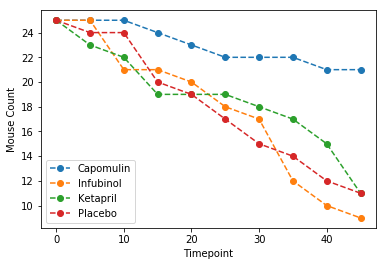

In [23]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x = survival_rates_df.Timepoint.unique()
for drug in drugs:
    y = survival_response_table_2[drug].values
    plt.plot(x,y,'--o', label=drug )
plt.legend(loc='best')
plt.ylabel('Mouse Count')
plt.xlabel('Timepoint')

plt.show()

## Three observed trends 
#### 1. Capomulin is most effective in reducing tumor volume, however it is the least effective in reducing number of metastatic sites
#### 2. Placebo is comparably just as effective in reducing tumor volume and number of metastatic sites as Infubinol and Ketapril
#### 3. All methods reduce the number of metastatic sites